# UnSupervised Learning In  Neural Network

 This IPython Notebook provides quick and easy access to  our solution to the miniproject1. This will accompany our formal reports. It has been added so that our solution can be easily run and ouput can be viewed. 



# Kohonen Map IPython

As usual we import the required libraries. It should be noted that we imported the python file provided for us for the project as Kohonen - we have changed the "k" to capital "K". This is to avoid conflict with the function called kohonen also present in the file. 
We have had all our functions present in a class which we defined as Kohonen. Most importantly in this class are two functions for SOM: 
    1. SOM_step2 : Uses distance between centres to measure convergence. 
    2. SOM_step: Uses the distance between centres and data to measure convergence.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import Kohonen # the function  has been defined by us
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Data And Visualize

As required by the project. We import the the data sets that we shall be working with. We have data.txt as the data and labels.txt as the labels. We can import the data set using numpy or pandas but for visualisation effectiveness we import it with Pandas. We can observe that both the data and labels have same shape.

In [2]:
#import the data to be used
Data = np.genfromtxt('data.txt')
print("Data Shape is: "  + str(Data.shape)) # we use  str to convert tuple to string.
Data

Data Shape is: (5000, 784)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [3]:
#import the labels and get shape
Labels = np.genfromtxt('labels.txt')
print("Label Shape is: "  + str(Labels.shape)) # we use  str to convert tuple to string.
Labels

Label Shape is: (5000,)


array([ 5.,  2.,  1., ...,  4.,  1.,  7.])

> For good visualization we also import with pandas. we views the data set and view the unique values present

In [4]:
labelFrame = pd.read_csv('labels.txt',header =None)

Let us view unique values in the labels so imported

In [5]:
labelFrame[0].unique()

array([5, 2, 1, 9, 7, 4, 0, 8, 3, 6])

> We also import the data.txt and view the unique values and summary of data statistics. We have used the delim_whitespace== True so that the spaces between the digits will be used as seperation. And we get a well organized table.

In [31]:
dataFrame = pd.read_csv('data.txt',header =None,delimiter=None,delim_whitespace=True)

We use pandas to view the first five rows. Not that because we set delimiter_whitespace to true thats why we can view the whole data set as a table. Since no preprocessing is required in this  project we leave it as it is and proceed.

In [32]:
dataFrame.head() 

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can view the unique digits present in our data set:

In [7]:
pd.Series(dataFrame.values.ravel()).unique()

array([  0,  16, 166, 128,   4,  29,  26, 180, 253, 178, 129, 170, 169,
        51, 151, 254, 236, 226, 177, 140, 241, 204, 153,  84, 148, 242,
       114,  76, 198,  48,  85,  10,  38, 214, 215, 189, 138, 230, 248,
        28, 154, 222, 102,  25, 160, 185, 197,  67,  47, 243, 141,  54,
       179, 164,  97, 235, 217,  89, 172,  78, 255, 103,   3, 240, 195,
        93,  56,  19, 251, 224,  73, 130, 188, 192, 159,   5,  13,   1,
       101,   8, 173, 229,  80,  22, 163, 234,  99,  50,  23, 139, 105,
       156, 211,  27,   2,  65, 239, 225,   7, 221, 199, 237, 218,  90,
       132,  71,  95,  74,  39,  82, 108, 110, 107,  32, 223,  55, 111,
       196,  14,  63, 201, 246, 220, 249,  60,  17, 219,  20, 150,  94,
        68,  35, 155, 247, 158,   9,  59, 194,  12,  18, 121, 213, 117,
       191,  45, 252, 113, 126, 200,  41, 216, 208, 145, 233, 244, 142,
        40, 176, 209, 125, 190, 104, 115, 118, 203,  31,  57, 157, 168,
       106, 228, 186,  44,  37, 175, 238, 100,  30, 146, 187, 17

A quick description of the data set: 

In [8]:
dataFrame.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,...,5000.00000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.31020,0.097800,0.002600,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.24439,3.607165,0.170291,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.00000,172.000000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Name to Digits Implementation

> As required by the project requirement we use the NametoDigit function to convert each of our names to a four digit numbers or figures.

We initiate our Kohonen map here as KohonenSOM. For convenience we have made the kohonen implementation into a class
This enables us to declare certain variables as global so that they can be used through out the implementation 

In [4]:
KohonenSOM = Kohonen.UnsupervisedLearning(itera=0,gaussChangeOverTime=[],centreDiff=[],dataCentreDiff=[],eta=0.1)

In [35]:
KohonenSOM.name2digits("Olagoke Lukman Olabisi")

array([1, 2, 5, 8], dtype=uint8)

In [36]:
KohonenSOM.name2digits("Hwang Chanhee")

array([0, 1, 7, 9], dtype=uint8)

Lets locate/label our digits location in the dats set

# Training The Neural Nets

We build a  Kohonen network of 6x6 neurons that are arranged on a square grid
with unit distance and use a Gaussian neighborhood function with (constant)
standard deviation σ = 3. Implement the Kohonen algorithm and apply it to the
data in data.txt. Choose a small (constant) learning rate and report how we
decide when your algorithm has converged.

We instantiate our algorithm with standard deviation of 3 , the other parameters parsed are in the function and are used to set the convergence critera. After this we make a plot using the parameters returned. 

In [79]:
KohonenSOM = Kohonen.UnsupervisedLearning(itera=0,gaussChangeOverTime=[],centreDiff=[],dataCentreDiff=[],eta=0.1)

Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :6
Standard Deviation: 0.1
Neighborhood Matrix: (6L, 6L)
Learning rate:0.1


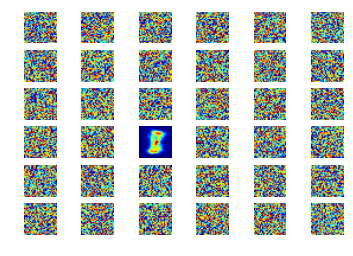

In [80]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=6,sigma=0.1,tmax=700);

The above plot was generated using a tolerance of 1e-8 to predict convergence. But the number of iterations was so small that the map would be in a metastable state . We will observe only a mosaic-like percellation of the map

Lets have some plots so we can be sure : This is where the parameters to the left of function call becomes important. The difference parameter returned above  records all values representing the difference between previous centres and next centres. IF this is below a threshold which we set the algorithm stops.And report that convergence has been reached.

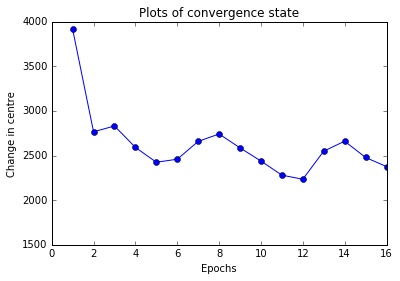

In [44]:
plt.plot(range(1, len(difference) + 1), difference, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(0,16)
plt.show()

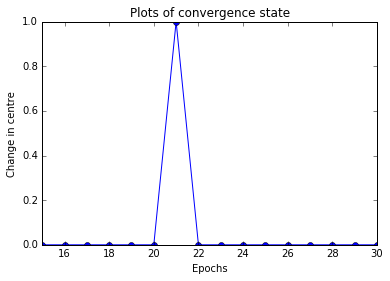

In [84]:
plt.plot(range(1, len(gaussChangeOverTime) + 1), gaussChangeOverTime, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(15,30)
plt.show()

The plots above clearly shows convergence was not reached because the plot shows no flat regions.

Lastly we make a plot of the Neighborhood function as it changes with time. Indeed we observe that it goes to zero per epoch which is the desired property of any eneighborhood function we might should use. 

Under the som_algorhthm, the algorithm does not converge, there is no ordering.

Kohonen.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.sort(x[t,:])


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :6
Standard Deviation: 3
Neighborhood Matrix: (6L, 6L)
Learning rate:0.3


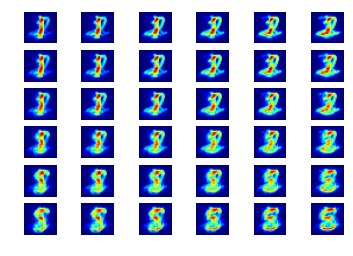

In [61]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=6,sigma=3,tmax=700);

It  reaches the low threshold value (0.01)we for convergence ,but the map is still meta stable. Note that the number of iteration is small and the sigma is snall too.

Kohonen.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.sort(x[t,:])


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :6
Standard Deviation: 0.3
Neighborhood Matrix: (6L, 6L)
Learning rate:0.1
convergence at loop 7 of iteration 227


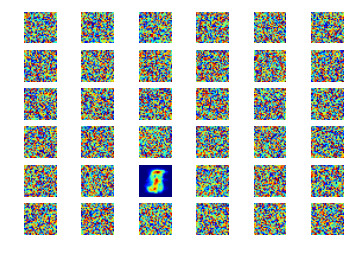

In [9]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=6,sigma=0.3,tmax=3000);

Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :6
Standard Deviation: 0.9
Neighborhood Matrix: (6L, 6L)
Learning rate:0.9


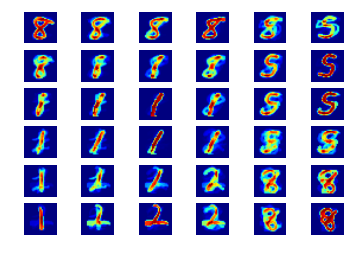

In [27]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=6,sigma=0.9,tmax=5000);

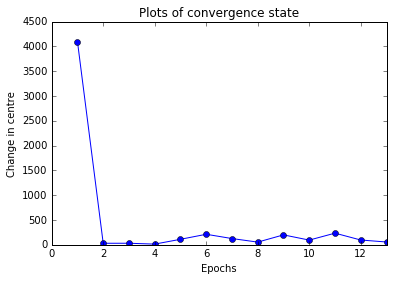

In [31]:
plt.plot(range(1, len(difference) + 1), difference, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(0,13)
plt.show()

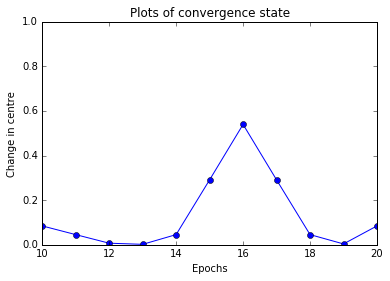

In [36]:
plt.plot(range(1, len(gaussChangeOverTime) + 1), gaussChangeOverTime, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(10,20)
plt.show()

During the first few(1000) steps  when the  proper ordering ordering takes , and learning rate is small as chosen above, the the radius of the Neighbor function becomes too small and the map will fail to be ordered globally. (The effect we see above from the plots). We observe various kinds of mosaic-like percellations of the map between which the ordering direction changes discontinuously.

We add that we have used a Gaussain  neighborhood kernel defined as :
                        
$$h_{ci}= \frac{\alpha(t)\ exp(-\|{r_c^2 + r_i^2}\|^2)}{2\sigma^2 }    $$     


$\alpha (t) $ is the scalar valued neighbourhood "learning rate " or function and $2\sigma^2$ defines the width of the kernel and this corresponds to the width of the kernel. Hence from the above expression for the kernel we can see why shrinking the learning rate reduces the width (neighborhood function) . 

If we consider the convergence limits of the learning process:

$$ w_i(t+i) = w_i(t) + w_{ci}[x(t) - w_i(t)] $$ 

where t is time co-ordinate , it becomes obvious why that when t width is small as a result of small learning rate discontinuity in ordering or convergence will be apparent.

We finally add that in general  $$h_{ci}=(\|r_c - r_i\|,t)$$ where $r_c $ $r_i $ are  the location vectors of nodes c (best_matching node) and i respectively . So that it becomes true that the average width and form of   $h_{ci} $ defines stiffness of the elastic surface to be fitted to our data points. Since the model above is this very stiff we expect not to see smooth ordering

# One Digit For Each Prototype

By changing the number of iterations to larger value and making the learing rate large, we were able to assighn one digit to each prototype that is represented best by it.

Kohonen.py:147: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000, 784)
Size of Kohonen Map :6
Standard Deviation: 9.0
Neighborhood Matrix: (6, 6)
Learning rate: 0.9


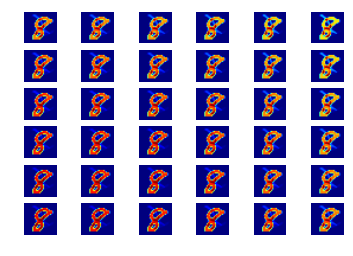

In [77]:
Kohonen.kohonen(name="Olagoke Lukman Olabisi",size_k=6,sigma=9.0,eta=0.9,n_iter=100000)

From the above we can see that we have increased the Sigma , learning rate and the number of iterations. By starting with large Sigma , and letting it shrink with time we allow for the fine-adjustment of the neighborhoos function. This coupled with the fact that we have a large iteration steps gives a wide time range to fully learn the network. In addition since the neighborhood function is large enough it allows for fine adjsutment of map during the initial period  and will attain small values over the long iteration period specified

#  Different Map Sizes And Neighbourhood Width

Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :4
Standard Deviation: 1.0
Neighborhood Matrix: (4L, 4L)
Learning rate:0.6


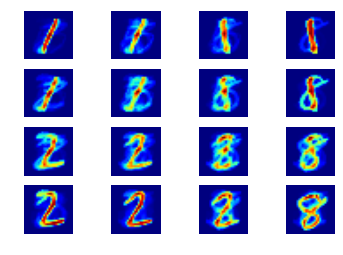

In [38]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=4,sigma=1.0,tmax=12000);

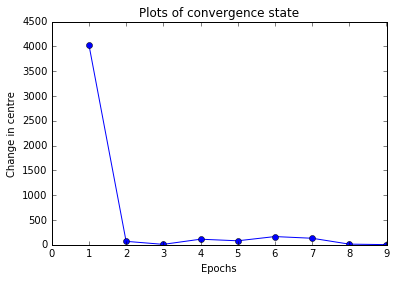

In [40]:
plt.plot(range(1, len(difference) + 1), difference, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(0,9)
plt.show()

In the cells  above we have changed the size of sigma and observed various probabilistic projection onto our network. We particularly not that the more we increase the sigma the there is much mapping towards a single digit type. The nodes seem not big enough to capture the whole input space. But as we increse sigma the non-linear probabilistic projection of single digits (eg digit 8) increases.

> Lets Change the size of the map and observe the effects too a liitle bit

Kohonen.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.sort(x[t,:])


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :10
Standard Deviation: 1.0
Neighborhood Matrix: (10L, 10L)
Learning rate:0.6
convergence at loop 70 of iteration 644


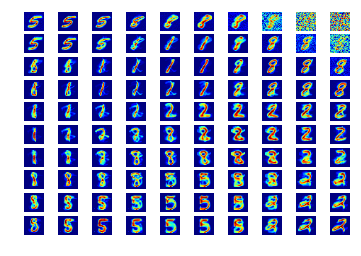

In [42]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=10,sigma=1.0,tmax=12000);

Kohonen.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.sort(x[t,:])


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :10
Standard Deviation: 1.0
Neighborhood Matrix: (10L, 10L)
Learning rate:0.6


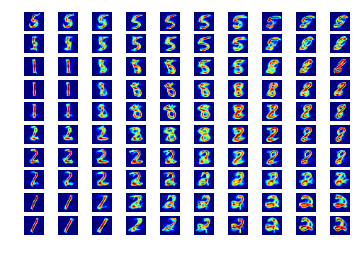

In [43]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=10,sigma=1.0,tmax=12000);

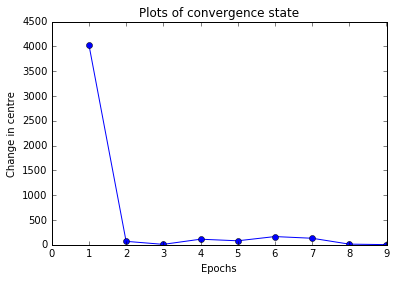

In [46]:
plt.plot(range(1, len(difference) + 1), difference, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(0,9)
plt.show()

Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :8
Standard Deviation: 1.2
Neighborhood Matrix: (8L, 8L)
Learning rate:0.8


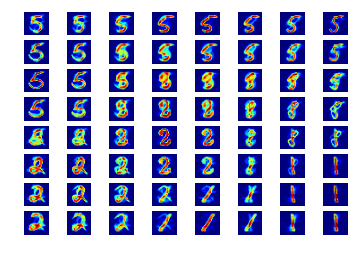

In [53]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenSOM.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=8,sigma=1.2,tmax=12000);

# Tweaking the Learning rate

In this part of the lab we have used a different learning rate. In particular we used a learning rate that decreases linearly in the loop. So that learning rate starts out large initially and decreases as we proceed. This generally fives a better picture than the constant value learning rate. We did not show how this affects convergence here ut we provided abundant visualization to show how properly aligned the prototype sets are.


In [130]:
def kohonen_rate_decreasing(name,size_k,sigma,eta,tmax):
    """Example for using create_data, plot_data and som_step.
    """
    plt.close('all')
    
    dim = 28*28
    data_range = 255.0
    
    # load in data and labels    
    data = np.array(np.loadtxt('data.txt'))
    labels = np.loadtxt('labels.txt')

    
    targetdigits = name2digits(name) # assign the four digits that should be used
    print("Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: ")
    print(targetdigits) # output the digits that were selected
    
    # this selects all data vectors that corresponds to one of the four digits
    data = data[np.logical_or.reduce([labels==x for x in targetdigits]),:]
    print("Shape of data vectors that corresponds to one of the four digits returned: ")
    print(data.shape)
    dy, dx = data.shape
    
    
    #set the size of the Kohonen map. In this case it will be 6 X 6
    #size_k = 6
    print("Size of Kohonen Map :" + str (size_k))
    #set the width of the neighborhood via the width of the gaussian that
    #describes it
    #sigma = 3.0 
    print("Standard Deviation: " + str(sigma))      
    
    #initialise the centers randomly
    centers = np.random.rand(size_k**2, dim) * data_range
    
    #build a neighborhood matrix
    neighbor = np.arange(size_k**2).reshape((size_k, size_k))
    print("Neighborhood Matrix: " + str(neighbor.shape))      

    
    #eta = 0.1 # HERE YOU HAVE TO SET YOUR OWN LEARNING RATE
    print("Learning rate: " + str(eta))      


    
    #set the random order in which the datapoints should be presented
    i_random = np.arange(tmax) % dy
    np.random.shuffle(i_random)
    
    for t, i in enumerate(i_random):
        som_step(centers, data[i,:],neighbor,eta,sigma)


    # for visualization, you can use this:
    
    for i in range(size_k**2):
        plt.subplot(size_k,size_k,i+1)
        
        plt.imshow(np.reshape(centers[i,:], [28, 28]),interpolation='bilinear')
        plt.axis('off')
        
    # leave the window open at the end of the loop
    plt.show()
    plt.draw()
   
    

def som_step(centers,data,neighbor,eta,sigma):
    """Performs one step of the sequential learning for a 
    self-organized map (SOM).
    
      centers = som_step(centers,data,neighbor,eta,sigma)
    
      Input and output arguments: 
       centers  (matrix) cluster centres. Have to be in format:
                         center X dimension
       data     (vector) the actually presented datapoint to be presented in
                         this timestep
       neighbor (matrix) the coordinates of the centers in the desired
                         neighborhood.
       eta      (scalar) a learning rate
       sigma    (scalar) the width of the gaussian neighborhood function.
                         Effectively describing the width of the neighborhood
    """
    
    size_k = int(np.sqrt(len(centers)))
    
    #find the best matching unit via the minimal distance to the datapoint
    b = np.argmin(np.sum((centers - np.resize(data, (size_k**2, data.size)))**2,1))

    # find coordinates of the winner
    a,b = np.nonzero(neighbor == b)
        
    # update all units
    for j in range(size_k**2):
        # find coordinates of this unit
        a1,b1 = np.nonzero(neighbor==j)
        # calculate the distance and discounting factor
        disc=gauss(np.sqrt((a-a1)**2+(b-b1)**2),[0, sigma])
        # update weights        
        centers[j,:] += disc * (eta) * (data - centers[j,:])
        #Update learning rate
        eta = 0.9*(1-j/1000); 
        

def gauss(x,p):
    """Return the gauss function N(x), with mean p[0] and std p[1].
    Normalized such that N(x=p[0]) = 1.
    """
    return np.exp((-(x - p[0])**2) / (2 * p[1]**2))

def name2digits(name):
    """ takes a string NAME and converts it into a pseudo-random selection of 4
     digits from 0-9.
     
     Example:
     name2digits('Felipe Gerhard')
     returns: [0 4 5 7]
     """
    
    name = name.lower()
    
    if len(name)>25:
        name = name[0:25]
        
    primenumbers = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97]
    
    n = len(name)
    
    s = 0.0
    
    for i in range(n):
        s += primenumbers[i]*ord(name[i])*2.0**(i+1)

    import scipy.io.matlab
    Data = scipy.io.matlab.loadmat('hash.mat',struct_as_record=True)
    x = Data['x']
    t = np.mod(s,x.shape[0])

    return np.sort(x[t,:])

For good results we should start with a  sigma that is  fairly  wide and letting it shrink with time. During the first few steps of the iterations where lerning rate is large the sigma can shrink linearly and therefore be able to contain all neighborhood cells.  

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:141: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000, 784)
Size of Kohonen Map :10
Standard Deviation: 1.0
Neighborhood Matrix: (10, 10)
Learning rate: 0.6


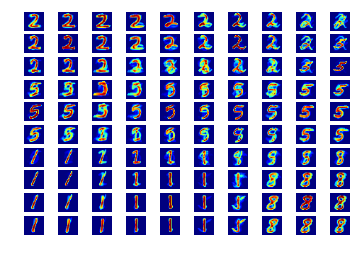

In [131]:
kohonen_rate_decreasing(name="Olagoke Lukman Olabisi",size_k=10,sigma=1.0,eta=0.6,tmax=12000)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:141: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000, 784)
Size of Kohonen Map :1
Standard Deviation: 10.0
Neighborhood Matrix: (1, 1)
Learning rate: 1.0


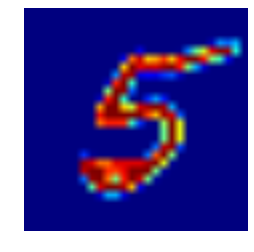

In [163]:
kohonen_rate_decreasing(name="Olagoke Lukman Olabisi",size_k=1,sigma=10.0,eta=1.0,tmax=10000)

Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000, 784)
Size of Kohonen Map :7
Standard Deviation: 0.9
Neighborhood Matrix: (7, 7)
Learning rate: 0.9


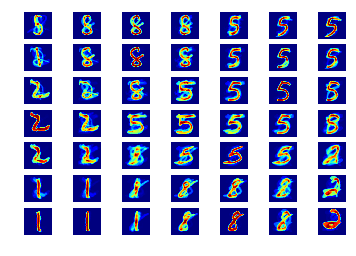

In [188]:
Kohonen.kohonen(name="Olagoke Lukman Olabisi",size_k=7,sigma=0.9,eta=0.9,tmax=7000)

Below we change the rate and the width function and observe convergence at same time

In [72]:
"""Python script for Exercise set 6 of the Unsupervised and 
Reinforcement Learning.
"""

import numpy as np
import matplotlib.pylab as plb
from numpy import linalg as LA


class UnsupervisedLearningConv(object):
    
    '''
    Input:
    iter: iterrations  count for convergence in the SOM 
    algorithm
    
    gaussChangeOverTime: hold the Gaussian values during iteration
    
    eta : Learning rate 
    
    centreDiff: difference between previous and next centre 
    iterations important for convergence 
    
    dataCentreDiff: difference between centre and data during the iteration
    important for convergence too.
    '''
    
    def __init__(self, itera=0,gaussChangeOverTime=[],centreDiff=[],dataCentreDiff=[],eta=0.0):
        self.itera = itera
        self.gaussChangeOverTime= gaussChangeOverTime
        self.centreDiff = centreDiff;
        self.dataCentreDiff = dataCentreDiff;
        self.eta = eta;
        
        
    
    
    def kohonen(self,name,size_k,sigma,tmax):
        """Example for using create_data, plot_data and som_step.
        """
        
        plb.close('all')
        
        eta=self.eta
        
        dim = 28*28
        data_range = 255.0

        # load in data and labels    
        data = np.array(np.loadtxt('data.txt'))
        labels = np.loadtxt('labels.txt')
        
        

        # use name2digits function and print the returned digits  
        
        targetdigits = self.name2digits(name) # assign the four digits that should be used
        print("Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: ")
        print(targetdigits) # output the digits that were selected
        
        

        # this selects all data vectors that corresponds to one of the four digits
        data = data[np.logical_or.reduce([labels==x for x in targetdigits]),:]
        print("Shape of data vectors that corresponds to one of the four digits returned: ")
        print(data.shape)
        dy, dx = data.shape


        
        #size_k = 6 . print size of map
        print("Size of Kohonen Map :" + str (size_k))
        
        

        #sigma = 3.0  print standard deviation
        print("Standard Deviation: " + str(sigma))   
        
        

        #initialise the centers randomly
        centers = np.random.rand(size_k**2, dim) * data_range
         
            
            
        #build a neighborhood matrix
        neighbor = np.arange(size_k**2).reshape((size_k, size_k))
        print("Neighborhood Matrix: " + str(neighbor.shape)) 
        
        

        #print the learning rate
       
        print("Learning rate:" + str(eta))      
       
        #set the random order in which the datapoints should be presented
        i_random = np.arange(tmax) % dy
        np.random.shuffle(i_random)
        
        # use flag to stop loop if true. cross check with the SOM call
        flag = False

        for t, i in enumerate(i_random):
            if (flag == False):
                flag=self.som_step_decreasing_convergence(centers, data[i,:],neighbor,eta,sigma)
                self.itera = t;
            else:
                break    


        # for visualization, you can use this:

        for i in range(size_k**2):
            plb.subplot(size_k,size_k,i+1)
            plb.imshow(np.reshape(centers[i,:], [28, 28]),interpolation='bilinear')
            plb.axis('off')

        # leave the window open at the end of the loop
        plb.show()
        plb.draw()        
        return self.gaussChangeOverTime,self.itera,self.dataCentreDiff,self.centreDiff



    def som_step_decreasing_convergence(self,centers,data,neighbor,eta,sigma):
        """Performs one step of the sequential learning for a 
        self-organized map (SOM).

          centers = som_step(centers,data,neighbor,eta,sigma)

          Input and output arguments: 
           centers  (matrix) cluster centres. Have to be in format:
                             center X dimension
           data     (vector) the actually presented datapoint to be presented in
                             this timestep
           neighbor (matrix) the coordinates of the centers in the desired
                             neighborhood.
           eta      (scalar) a learning rate
           sigma    (scalar) the width of the gaussian neighborhood function.
                             Effectively describing the width of the neighborhood
        """

        size_k = int(np.sqrt(len(centers)))

        #find the best matching unit via the minimal distance to the datapoint
        b = np.argmin(np.sum((centers - np.resize(data, (size_k**2, data.size)))**2,1))

        # find coordinates of the winner
        a,b = np.nonzero(neighbor == b)
        count =0;
        dataCentreDiff_copy=0;
        dataCentreDiff_Previous=0;
        
        #criteria to stop loop initialised to 1
        difference =1;
        
        # Use flag to stop loop and inform the kohonen function above
        flag =False
        
        
        # update all units
        for j in range(size_k**2):
            
            if (difference>=0.1):
                #winner function
                count=count +1
                
                # find coordinates of this unit
                a1,b1 = np.nonzero(neighbor==j)

                #count iterations before loop elapses
                

                # calculate the distance and discounting factor
                disc=self.gauss(np.sqrt((a-a1)**2+(b-b1)**2),[0, sigma])

                # store the value of neighbor hood function
                discVal = disc.copy()
                self.gaussChangeOverTime.append(discVal)

                # update weights        
                centers[j,:] += disc * eta * (data - centers[j,:])

                #change in deltacentre.compute euclid distance between data centre and data
                dataCentreDiff_copy =LA.norm(( centers[j,:] - data), 2)
               
                #Get difference between previous and present norm
                difference = np.absolute(dataCentreDiff_Previous - dataCentreDiff_copy)
                
                #copy the datacentre_copy to previous (temporary storage)
                dataCentreDiff_Previous = dataCentreDiff_copy.copy()
                
                #append difference and datacentre difference to global variable to enable plotting
                self.dataCentreDiff.append(dataCentreDiff_copy)
                self.centreDiff.append(difference)
                
                #Update learning rate
                eta = 0.9*(1-j/1000); 
                #Update sigma rate
                sigma = sigma - 0.0004*(1-j)
                
                
                
            else:
                flag = True;
                print("convergence at loop " + str(count) + " of" + " iteration " + str(self.itera) )
                break;
        return flag;
    
    
        
   
        
    def gauss(self,x,p):
        """Return the gauss function N(x), with mean p[0] and std p[1].
        Normalized such that N(x=p[0]) = 1.
        """
        return np.exp((-(x - p[0])**2) / (2 * p[1]**2))

    def name2digits(self,name):
        """ takes a string NAME and converts it into a pseudo-random selection of 4
         digits from 0-9.

         Example:
         name2digits('Felipe Gerhard')
         returns: [0 4 5 7]
         """

        name = name.lower()

        if len(name)>25:
            name = name[0:25]

        primenumbers = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97]

        n = len(name)

        s = 0.0

        for i in range(n):
            s += primenumbers[i]*ord(name[i])*2.0**(i+1)

        import scipy.io.matlab
        Data = scipy.io.matlab.loadmat('hash.mat',struct_as_record=True)
        x = Data['x']
        t = np.mod(s,x.shape[0])

        return np.sort(x[t,:])

In [75]:
KohonenConv =  UnsupervisedLearningConv(itera=0,gaussChangeOverTime=[],
                                                             centreDiff=[],dataCentreDiff=[],eta=0.8)

Compared to the one we plotted earlier (with only decreasing rate) we can see for the same plot but this time with rate decreasing and width decreasing too . The area it maps with distict  digits is reducedfor obvious reason: due to decreasing width  

C:\Users\hwangchanhee\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:248: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :10
Standard Deviation: 1.0
Neighborhood Matrix: (10L, 10L)
Learning rate:0.8


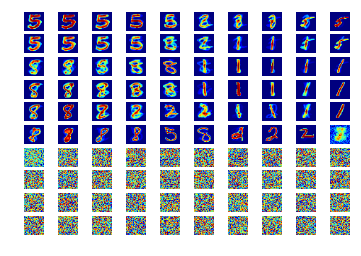

In [66]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenConv.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=10,sigma=1.0,tmax=12000);

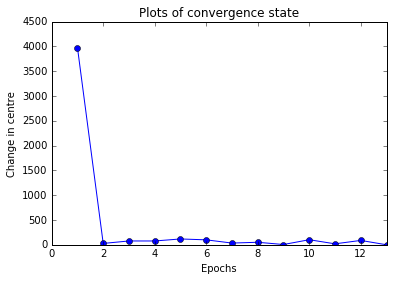

In [68]:
plt.plot(range(1, len(difference) + 1), difference, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Change in centre')
plt.title("Plots of convergence state")
plt.xlim(0,13)
plt.show()

C:\Users\hwangchanhee\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:248: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :8
Standard Deviation: 0.9
Neighborhood Matrix: (8L, 8L)
Learning rate:0.8
convergence at loop 28 of iteration 184


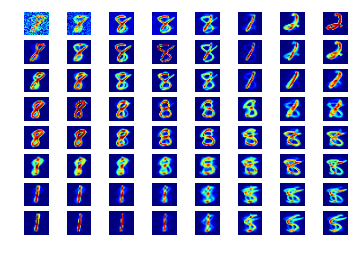

In [76]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenConv.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=8,sigma=0.9,tmax=12000);

Marked increase in perfromance with decreasing learning and width of kernel

C:\Users\hwangchanhee\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:248: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :6
Standard Deviation: 0.9
Neighborhood Matrix: (6L, 6L)
Learning rate:0.8


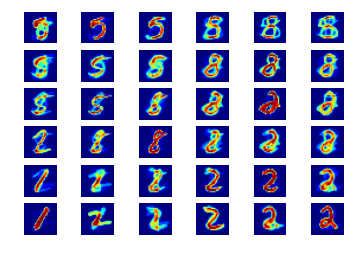

In [70]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenConv.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=6,sigma=0.9,tmax=12000);

C:\Users\hwangchanhee\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:248: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Digits representation of 'Olagoke Lukman Olabisi' using name2digits Function is: 
[1 2 5 8]
Shape of data vectors that corresponds to one of the four digits returned: 
(2000L, 784L)
Size of Kohonen Map :6
Standard Deviation: 0.5
Neighborhood Matrix: (6L, 6L)
Learning rate:0.8
convergence at loop 11 of iteration 55


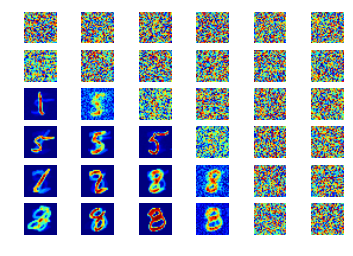

In [78]:
gaussChangeOverTime,itera,datacentrediff,difference=KohonenConv.kohonen(name="Olagoke Lukman Olabisi",
                                                                       size_k=6,sigma=0.5,tmax=12000);

As we can see it reported the loop plus the converging point base on the threshold we set

> We conclude that since the learning rate us statistical process, the final accuracy of the projections or transformations to the feature space depends on the number of staeps in the final convergence phase, which should be reasonably long; this is a prerequisite . 
> A general rule of thumb is that for good statistical accuracy the number of steps should be at least 500 times the number of nodes in the network. 
>On the other hand the number of components in the input space has no effect on the number of iteration steps

# On Neighbour Function And its Effect

We remark generally that as long as the SOM process starts wiht a wide Sigma (Neighborhood function or statndard deviation in our example) - such a value being of dimension same order of magnitude as half the size  of largest dimensions of array there are no risk for ending in a metastable state. A metastable state configration is one for which the average expected distortion  measure would end up in a local minimum than a global one).  With time-invariant Neighborhood function(which is not so in our case) the situation may be quite different. 

In particular if the Neighborhood function is convex there exist no astable states except the ordered ones. If the Neighborhood function is concave there exist metastable states that may slow down the ordering of process by order of magnitude. 

Therefore if in the beginning process, the  Neighborhood function is  convex like the middle of the Gaussian at large standard deviation , the ordering can be achieved almost surely and after ordering the Neighborhood function can be shrunk to an improved approximation of the probability density.

The ordering conditions are severe if the input space has same dimensionality as the network array. But in this exercise the network array is far smaller than the input space.  Genral we seek an optimal orientationof the feature space that best imitates the overall structure of the vector density. SO that it is desired the input space be of much higher dimensionality.